## Lấy dữ liệu điểm chuẩn các trường đại học tại TP. HCM các năm 2020,2021,2022

_____________________

In [1]:
import requests 
import pandas as pd  
from  bs4 import BeautifulSoup

- Đường link trang web để craw data

In [2]:
# Dữ liệu điểm chuẩn
url_scores = 'https://huongnghiep.hocmai.vn/diem-chuan/'

- Check trạng thái trả về của 2 trang web trên

In [3]:
# Sử dụng hàm get từ requests để truy cập trang web
response_scores = requests.get(url_scores)

if response_scores.status_code == 200:
    print("Send requests complete")
else:
    print("ERROR")

Send requests complete


_______________________________________

### 1. Xác định dữ liệu cần đào

##### 1.1. Danh sách các trường đại học kèm link trang web
    + TP.HCM
    + Đại học

##### 1.2. Điểm chuẩn các trường qua các năm
    + Năm 2021
    + Năm 2022
    + Năm 2023

##### 1.3. Tiến trình các bước

- Ta sẽ lấy dữ liệu danh sách các trường và url từ inspect sau đó copy element  
-> Truy cập vào từng url để ra danh sách điểm của từng trường  
-> sử dụng selenium để lọc pages các năm mong muốn  
-> Chuyển thành soup sau đó xử lý dữ liệu đưa về DataFrame -> to_csv()


-------------------------------------

### 2. Đào dữ liệu

#### 2.1. Danh sách các trường đại học

In [4]:
html_listOfUnivesity = """<ul class="list_style" id="benchmarking" style="padding-left: 10px">
  <li>
    <a title="Nhạc Viện TPHCM" href="/diem-truong/nhac-vien-tphcm"
      ><strong class="clblue2">HCMCONS</strong> - Nhạc Viện TPHCM</a
    >
  </li>
  <li>
    <a title="Đại Học Hoa Sen" href="/diem-truong/dai-hoc-hoa-sen"
      ><strong class="clblue2">HSU</strong> - Đại Học Hoa Sen</a
    >
  </li>
  <li>
    <a title="Đại Học Sài Gòn" href="/diem-truong/dai-hoc-sai-gon"
      ><strong class="clblue2">SGU</strong> - Đại Học Sài Gòn</a
    >
  </li>
  <li>
    <a title="Đại Học Mở TPHCM" href="/diem-truong/dai-hoc-mo-tphcm"
      ><strong class="clblue2">OU</strong> - Đại Học Mở TPHCM</a
    >
  </li>
  <li>
    <a title="Đại Học Văn Hiến" href="/diem-truong/dai-hoc-van-hien"
      ><strong class="clblue2">VHU</strong> - Đại Học Văn Hiến</a
    >
  </li>
  <li>
    <a title="Đại Học Gia Định" href="/diem-truong/dai-hoc-gia-dinh"
      ><strong class="clblue2">GDU</strong> - Đại Học Gia Định</a
    >
  </li>
  <li>
    <a title="Đại Học Luật TPHCM" href="/diem-truong/dai-hoc-luat-tphcm"
      ><strong class="clblue2">HCMUL</strong> - Đại Học Luật TPHCM</a
    >
  </li>
  <li>
    <a title="Học viện cán bộ TPHCM" href="/diem-truong/hoc-vien-can-bo-tphcm"
      ><strong class="clblue2">HCA</strong> - Học viện cán bộ TPHCM</a
    >
  </li>
  <li>
    <a title="Đại Học Kinh Tế TPHCM" href="/diem-truong/dai-hoc-kinh-te-tphcm"
      ><strong class="clblue2">UEH</strong> - Đại Học Kinh Tế TPHCM</a
    >
  </li>
  <li>
    <a title="Đại Học Văn Hóa TPHCM" href="/diem-truong/dai-hoc-van-hoa-tphcm"
      ><strong class="clblue2">HCMUC</strong> - Đại Học Văn Hóa TPHCM</a
    >
  </li>
  <li>
    <a title="Đại Học Y Dược TPHCM" href="/diem-truong/dai-hoc-y-duoc-tphcm"
      ><strong class="clblue2">UMP HCM</strong> - Đại Học Y Dược TPHCM</a
    >
  </li>
  <li>
    <a title="Đại Học Nông Lâm TPHCM" href="/diem-truong/dai-hoc-nong-lam-tphcm"
      ><strong class="clblue2">NLU</strong> - Đại Học Nông Lâm TPHCM</a
    >
  </li>
  <li>
    <a title="Đại Học Sư Phạm TPHCM" href="/diem-truong/dai-hoc-su-pham-tphcm"
      ><strong class="clblue2">HCMUE</strong> - Đại Học Sư Phạm TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Ngân Hàng TPHCM"
      href="/diem-truong/dai-hoc-ngan-hang-tphcm"
      ><strong class="clblue2">HUB</strong> - Đại Học Ngân Hàng TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Kiến Trúc TPHCM"
      href="/diem-truong/dai-hoc-kien-truc-tphcm"
      ><strong class="clblue2">UAH</strong> - Đại Học Kiến Trúc TPHCM</a
    >
  </li>
  <li>
    <a title="Đại Học Mỹ Thuật TPHCM" href="/diem-truong/dai-hoc-my-thuat-tphcm"
      ><strong class="clblue2">HCMUFA</strong> - Đại Học Mỹ Thuật TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học An Ninh Nhân Dân"
      href="/diem-truong/dai-hoc-an-ninh-nhan-dan"
      ><strong class="clblue2">VPSU</strong> - Đại Học An Ninh Nhân Dân</a
    >
  </li>
  <li>
    <a
      title="Đại học Công Nghệ TPHCM"
      href="/diem-truong/dai-hoc-cong-nghe-tphcm"
      ><strong class="clblue2">HUTECH</strong> - Đại học Công Nghệ TPHCM</a
    >
  </li>
  <li>
    <a title="Đại Học Tôn Đức Thắng" href="/diem-truong/dai-hoc-ton-duc-thang"
      ><strong class="clblue2">TDTU</strong> - Đại Học Tôn Đức Thắng</a
    >
  </li>
  <li>
    <a
      title="Đại Học Dân Lập Văn Lang"
      href="/diem-truong/dai-hoc-dan-lap-van-lang"
      ><strong class="clblue2">VLU</strong> - Đại Học Dân Lập Văn Lang</a
    >
  </li>
  <li>
    <a
      title="Đại Học Công Nghiệp TPHCM"
      href="/diem-truong/dai-hoc-cong-nghiep-tphcm"
      ><strong class="clblue2">IUH</strong> - Đại Học Công Nghiệp TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Quốc Tế Sài Gòn"
      href="/diem-truong/dai-hoc-quoc-te-sai-gon"
      ><strong class="clblue2">SIU</strong> - Đại Học Quốc Tế Sài Gòn</a
    >
  </li>
  <li>
    <a
      title="Đại học Hùng Vương - TPHCM"
      href="/diem-truong/dai-hoc-hung-vuong-tphcm"
      ><strong class="clblue2">HVUH</strong> - Đại học Hùng Vương - TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Tài Chính Marketing"
      href="/diem-truong/dai-hoc-tai-chinh-marketing"
      ><strong class="clblue2">UFM</strong> - Đại Học Tài Chính Marketing</a
    >
  </li>
  <li>
    <a
      title="Đại Học Công Nghệ Sài Gòn"
      href="/diem-truong/dai-hoc-cong-nghe-sai-gon"
      ><strong class="clblue2">STU</strong> - Đại Học Công Nghệ Sài Gòn</a
    >
  </li>
  <li>
    <a
      title="Học Viện Hàng Không Việt Nam"
      href="/diem-truong/hoc-vien-hang-khong-viet-nam"
      ><strong class="clblue2">VAA</strong> - Học Viện Hàng Không Việt Nam</a
    >
  </li>
  <li>
    <a
      title="Đại Học Quốc Tế Hồng Bàng"
      href="/diem-truong/dai-hoc-quoc-te-hong-bang"
      ><strong class="clblue2">HIU</strong> - Đại Học Quốc Tế Hồng Bàng</a
    >
  </li>
  <li>
    <a
      title="ĐH Tài Nguyên môi trường TPHCM"
      href="/diem-truong/dh-tai-nguyen-moi-truong-tphcm"
      ><strong class="clblue2">HCMUNRE</strong> - ĐH Tài Nguyên môi trường
      TPHCM</a
    >
  </li>
  <li>
    <a
      title="Khoa Y - Đại học Quốc Gia TPHCM"
      href="/diem-truong/khoa-y-dai-hoc-quoc-gia-tphcm"
      ><strong class="clblue2">SM</strong> - Khoa Y - Đại học Quốc Gia TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Thủy Lợi (Cơ sở 2)"
      href="/diem-truong/dai-hoc-thuy-loi-co-so-2"
      ><strong class="clblue2">TLU</strong> - Đại Học Thủy Lợi (Cơ sở 2)</a
    >
  </li>
  <li>
    <a
      title="Đại Học Thể Dục Thể Thao TPHCM"
      href="/diem-truong/dai-hoc-the-duc-the-thao-tphcm"
      ><strong class="clblue2">HCUS</strong> - Đại Học Thể Dục Thể Thao TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Y Khoa Phạm Ngọc Thạch"
      href="/diem-truong/dai-hoc-y-khoa-pham-ngoc-thach"
      ><strong class="clblue2">PNTU</strong> - Đại Học Y Khoa Phạm Ngọc Thạch</a
    >
  </li>
  <li>
    <a
      title="Đại Học Kinh Tế -Tài chính TPHCM"
      href="/diem-truong/dai-hoc-kinh-te-tai-chinh-tphcm"
      ><strong class="clblue2">UEF</strong> - Đại Học Kinh Tế -Tài chính
      TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Ngoại Thương (phía Nam)"
      href="/diem-truong/dai-hoc-ngoai-thuong-phia-nam"
      ><strong class="clblue2">FTU2</strong> - Đại Học Ngoại Thương (phía
      Nam)</a
    >
  </li>
  <li>
    <a
      title="Đại Học Sư Phạm Kỹ Thuật TPHCM"
      href="/diem-truong/dai-hoc-su-pham-ky-thuat-tphcm"
      ><strong class="clblue2">HCMUTE</strong> - Đại Học Sư Phạm Kỹ Thuật
      TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Giao Thông Vận Tải TPHCM"
      href="/diem-truong/dai-hoc-giao-thong-van-tai-tphcm"
      ><strong class="clblue2">UT-HCMC</strong> - Đại Học Giao Thông Vận Tải
      TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Sân Khấu, Điện Ảnh TPHCM"
      href="/diem-truong/dai-hoc-san-khau-dien-anh-tphcm"
      ><strong class="clblue2">MSU</strong> - Đại Học Sân Khấu, Điện Ảnh
      TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Ngoại Ngữ – Tin Học TPHCM"
      href="/diem-truong/dai-hoc-ngoai-ngu-tin-hoc-tphcm"
      ><strong class="clblue2">HUFLIT</strong> - Đại Học Ngoại Ngữ – Tin Học
      TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Công Thương TPHCM"
      href="/diem-truong/dai-hoc-cong-thuong-tphcm"
      ><strong class="clblue2">HUIT</strong> - Đại Học Công Thương TPHCM</a
    >
  </li>
  <li>
    <a
      title="Học Viện Hành Chính Quốc Gia (phía Nam)"
      href="/diem-truong/hoc-vien-hanh-chinh-quoc-gia-phia-nam"
      ><strong class="clblue2">NAPA</strong> - Học Viện Hành Chính Quốc Gia
      (phía Nam)</a
    >
  </li>
  <li>
    <a
      title="Đại Học Sư Phạm Thể DụcThể Thao TPHCM"
      href="/diem-truong/dai-hoc-su-pham-the-ducthe-thao-tphcm"
      ><strong class="clblue2">UPES</strong> - Đại Học Sư Phạm Thể DụcThể Thao
      TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Bách Khoa – Đại Học Quốc Gia TPHCM"
      href="/diem-truong/dai-hoc-bach-khoa-dai-hoc-quoc-gia-tphcm"
      ><strong class="clblue2">VNUHCM-UT</strong> - Đại Học Bách Khoa – Đại Học
      Quốc Gia TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Quốc Tế – Đại Học Quốc Gia TPHCM"
      href="/diem-truong/dai-hoc-quoc-te-dai-hoc-quoc-gia-tphcm"
      ><strong class="clblue2">HCMIU</strong> - Đại Học Quốc Tế – Đại Học Quốc
      Gia TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Giao Thông Vận Tải (Cơ sở Phía Nam)"
      href="/diem-truong/dai-hoc-giao-thong-van-tai-co-so-phia-nam"
      ><strong class="clblue2">UTC2</strong> - Đại Học Giao Thông Vận Tải (Cơ sở
      Phía Nam)</a
    >
  </li>
  <li>
    <a
      title="Đại Học Lao Động – Xã Hội (Cơ sở phía Nam)"
      href="/diem-truong/dai-hoc-lao-dong-xa-hoi-co-so-phia-nam"
      ><strong class="clblue2">ULSA2</strong> - Đại Học Lao Động – Xã Hội (Cơ sở
      phía Nam)</a
    >
  </li>
  <li>
    <a
      title="Học Viện Công Nghệ Bưu Chính Viễn Thông (phía Nam)"
      href="/diem-truong/hoc-vien-cong-nghe-buu-chinh-vien-thong-phia-nam"
      ><strong class="clblue2">PTIT</strong> - Học Viện Công Nghệ Bưu Chính Viễn
      Thông (phía Nam)</a
    >
  </li>
  <li>
    <a
      title="Đại học Kinh Tế – Luật – Đại Học Quốc Gia TPHCM"
      href="/diem-truong/dai-hoc-kinh-te-luat-dai-hoc-quoc-gia-tphcm"
      ><strong class="clblue2">VNUHCM - UEL</strong> - Đại học Kinh Tế – Luật –
      Đại Học Quốc Gia TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Khoa Học Tự Nhiên – Đại Học Quốc Gia TPHCM"
      href="/diem-truong/dai-hoc-khoa-hoc-tu-nhien-dai-hoc-quoc-gia-tphcm"
      ><strong class="clblue2">VNUHCM – US</strong> - Đại Học Khoa Học Tự Nhiên
      – Đại Học Quốc Gia TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Công Nghệ Thông Tin – Đại Học Quốc Gia TPHCM"
      href="/diem-truong/dai-hoc-cong-nghe-thong-tin-dai-hoc-quoc-gia-tphcm"
      ><strong class="clblue2">VNUHCM - UIT</strong> - Đại Học Công Nghệ Thông
      Tin – Đại Học Quốc Gia TPHCM</a
    >
  </li>
  <li>
    <a
      title="Đại Học Khoa Học Xã Hội và Nhân Văn – Đại Học Quốc Gia TPHCM"
      href="/diem-truong/dai-hoc-khoa-hoc-xa-hoi-va-nhan-van-dai-hoc-quoc-gia-tphcm"
      ><strong class="clblue2">VNUHCM-USSH</strong> - Đại Học Khoa Học Xã Hội và
      Nhân Văn – Đại Học Quốc Gia TPHCM</a
    >
  </li>
  <li>
    <a
      title="Trường Sĩ Quan Kĩ Thuật Quân Sự -  Hệ Quân sự - Đại Học Trần Đại Nghĩa"
      href="/diem-truong/truong-si-quan-ki-thuat-quan-su-he-quan-su-dai-hoc-tran-dai-nghia"
      ><strong class="clblue2">TDNU</strong> - Trường Sĩ Quan Kĩ Thuật Quân Sự -
      Hệ Quân sự - Đại Học Trần Đại Nghĩa</a
    >
  </li>
  <li>
    <a
      title="Khoa Chính trị - Hành chính (Đại học Quốc gia TP HCM)"
      href="/diem-truong/khoa-chinh-tri-hanh-chinh-dai-hoc-quoc-gia-tp-hcm"
      ><strong class="clblue2">SPAS</strong> - Khoa Chính trị - Hành chính (Đại
      học Quốc gia TP HCM)</a
    >
  </li>
  <li>
    <a
      title="Đại học Quản lý và Công nghệ TPHCM"
      href="/diem-truong/dai-hoc-quan-ly-va-cong-nghe-tphcm"
      ><strong class="clblue2">UMT</strong> - Đại học Quản lý và Công nghệ
      TPHCM</a
    >
  </li>
</ul>
"""

In [5]:
# Các dòng dữ liệu chứa trong tag ul > li > a > strong
soup_listUniversity = BeautifulSoup(html_listOfUnivesity,'html.parser')

In [6]:
soup_listUniversity

<ul class="list_style" id="benchmarking" style="padding-left: 10px">
<li>
<a href="/diem-truong/nhac-vien-tphcm" title="Nhạc Viện TPHCM"><strong class="clblue2">HCMCONS</strong> - Nhạc Viện TPHCM</a>
</li>
<li>
<a href="/diem-truong/dai-hoc-hoa-sen" title="Đại Học Hoa Sen"><strong class="clblue2">HSU</strong> - Đại Học Hoa Sen</a>
</li>
<li>
<a href="/diem-truong/dai-hoc-sai-gon" title="Đại Học Sài Gòn"><strong class="clblue2">SGU</strong> - Đại Học Sài Gòn</a>
</li>
<li>
<a href="/diem-truong/dai-hoc-mo-tphcm" title="Đại Học Mở TPHCM"><strong class="clblue2">OU</strong> - Đại Học Mở TPHCM</a>
</li>
<li>
<a href="/diem-truong/dai-hoc-van-hien" title="Đại Học Văn Hiến"><strong class="clblue2">VHU</strong> - Đại Học Văn Hiến</a>
</li>
<li>
<a href="/diem-truong/dai-hoc-gia-dinh" title="Đại Học Gia Định"><strong class="clblue2">GDU</strong> - Đại Học Gia Định</a>
</li>
<li>
<a href="/diem-truong/dai-hoc-luat-tphcm" title="Đại Học Luật TPHCM"><strong class="clblue2">HCMUL</strong> - Đại Họ

#### 2.1.1. Trính xuất danh sách các trường đại học

In [7]:
university_lst = []
base_url = 'https://huongnghiep.hocmai.vn'

# chuyển các các dữ liệu trong tag 'li' thành 1 list
rows = soup_listUniversity.find_all('li')
# duyệt qua từng phần tử trong list
for row in rows:
    # trong tag a có thuộc tính title và href cùng với 1 tag con là 'strong'
    _ = row.find('a')
    # lấy dữ liệu
    university_code = row.find('strong').text.strip()
    university_name = _.get('title').strip()
    university_url = base_url + _.get('href').strip()
    
    university_lst.append([university_code,university_name,university_url])
# chuyển dữ liệu về dataframe -> to_csv()
university_df = pd.DataFrame(university_lst, columns = ['university_code','university_name','university_url'])

- Kết quả

In [8]:
university_df

,university_code,university_name,university_url
0,HCMCONS,Nhạc Viện TPHCM,https://huongnghiep.hocmai.vn/diem-truong/nhac...
1,HSU,Đại Học Hoa Sen,https://huongnghiep.hocmai.vn/diem-truong/dai-...
2,SGU,Đại Học Sài Gòn,https://huongnghiep.hocmai.vn/diem-truong/dai-...
3,OU,Đại Học Mở TPHCM,https://huongnghiep.hocmai.vn/diem-truong/dai-...
4,VHU,Đại Học Văn Hiến,https://huongnghiep.hocmai.vn/diem-truong/dai-...
5,GDU,Đại Học Gia Định,https://huongnghiep.hocmai.vn/diem-truong/dai-...
6,HCMUL,Đại Học Luật TPHCM,https://huongnghiep.hocmai.vn/diem-truong/dai-...
7,HCA,Học viện cán bộ TPHCM,https://huongnghiep.hocmai.vn/diem-truong/hoc-...
8,UEH,Đại Học Kinh Tế TPHCM,https://huongnghiep.hocmai.vn/diem-truong/dai-...
9,HCMUC,Đại Học Văn Hóa TPHCM,https://huongnghiep.hocmai.vn/diem-truong/dai-...


### 2.3. Trích xuất dữ liệu cho từng trường

- Check task  
[1] Thu thập danh sách trường đh tphcm  
[2] Thu thập điểm chuẩn năm 2023  
[3] Thu thập điểm chuẩn năm 2022  
[4] Thu thập điểm chuẩn năm 2021  

In [9]:
# Các thư viện selenium hỗ trợ việc craw data
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
import time
import random

- Hàm lọc dữ liệu cho trang web
    + Đóng quảng cáo popup
    + Lọc dữ liệu của năm muón lấy
- Trả về BeautifulSoup

#### 2.3.1. Lấy dữ liệu của 1 trường

In [10]:
def get_html_after_popup_closed(url: str, year: str) -> BeautifulSoup:

    # Cấu hình trình duyệt headless
    options = Options()

    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")

    # Khởi tạo trình duyệt
    driver = webdriver.Chrome(options=options)

    try:
        # Truy cập trang
        driver.get(url)
        time.sleep(2.5)
        # Đợi popup và đóng nếu có
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.CLASS_NAME, "uk-modal-close"))
            )
            close_button.click()
            print("close popup")
        except Exception as e:
            print(f"ERROR: {e}")

        time.sleep(0.8)
        # Chọn năm
        try:
            year_select = Select(driver.find_element(By.NAME, "year"))
            year_select.select_by_value(year)
            print(f"fillter {year}")
        except Exception as e:
            print(f"ERROR: {e}")

        WebDriverWait(driver, 10)
        # Chờ trang load
        time.sleep(7)

        # Lấy HTML và parse bằng BeautifulSoup
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        return soup

    finally:
        driver.quit()

- Từ dữ liệu BeautifulSoup trả về ta tiếp tục trích xuất dữ liệu
- Trả về dataframe

In [11]:
def extract_data_from_html(soup: BeautifulSoup, university_code: str) -> pd.DataFrame:
    
    lst_data = [] # chứa từng dòng dữ liệu
    table_body = soup.find("tbody")
    
    # tìm dữ liệu có tag 'tr' trong 'tbody' và chuyển nó thành các list
    rows = table_body.find_all("tr")
    # duyệt từng phần tử : tương đương với duyệt từng dòng dữ liệu
    for cols in rows:
        col = cols.find_all("td") # 'td': table data, dữ liệu trong từng cell
        
        if len(col) == 7: # bảng có 7 thuộc tính
            specialized_major = col[1].text.strip()
            major_name = col[2].text.strip()
            major_code = col[3].text.strip()
            subject_group_code = col[4].text.strip()
            benchmark_score = col[5].text.strip()
            note = col[6].text.strip()

            # Thêm vào mảng
            lst_data.append([
                    university_code,
                    specialized_major,
                    major_name,
                    major_code,
                    subject_group_code,
                    benchmark_score,
                    note,
                ])

    # trả về dataFrame trống nếu không có dữ liệu
    if len(lst_data) == 0:
        print(f"Not found data for {university_code}")
        return pd.DataFrame(columns= [
                    'university_code',
                    'specialized_major',
                    'major_name',
                    'major_code',
                    'subject_group_code',
                    'benchmark_score',
                    'note',
                ])

    return pd.DataFrame(lst_data, columns= [
                    'university_code',
                    'specialized_major',
                    'major_name',
                    'major_code',
                    'subject_group_code',
                    'benchmark_score',
                    'note',
                ])

- Dữ liệu để run test

In [12]:
# ou = open university
ou_url = university_df.iloc[3,2]
ou_code = university_df.iloc[3,0]

# 2024 không có data nên ta sẽ lấy 2023 để test
year_value = '2023'

- Kết quả mẫu

In [13]:
soup = get_html_after_popup_closed( url=ou_url,year=year_value )
# url -> BeautyfulSoup
df = extract_data_from_html(soup,university_code=ou_code)
# BeautyfulSoup -> DataFrame
df

close popup
fillter 2023


,university_code,specialized_major,major_name,major_code,subject_group_code,benchmark_score,note
0,OU,Công nghệ kỹ thuật công trình xây dựng,Công nghệ kỹ thuật công trình xây dựng,7510102,"A00, A01, D01, D07",16.5,Tốt nghiệp THPT
1,OU,Công nghệ kỹ thuật công trình xây dựng,Công nghệ kỹ thuật công trình xây dựng,7510102C,"A00, A01, D01, D07",16.5,Tốt nghiệp THPT; CLC
2,OU,Tài chính - Ngân hàng,Tài chính - Ngân hàng,7340201C,"A01, D01, D96, D07",22,Tốt nghiệp THPT
3,OU,Công nghệ sinh học,Công nghệ sinh học,7420201C,"B00, A01, D07, D08",16.5,Tốt nghiệp THPT; CLC
4,OU,Quản trị kinh doanh,Quản trị kinh doanh,7340101C,"A01, D01, D96, D07",22.6,Tốt nghiệp THPT; CLC
5,OU,Luật kinh tế,Luật,7380107C,"A01, D01, D07, D14",23.1,Tốt nghiệp THPT; CLC
6,OU,Ngôn ngữ Anh,Ngôn ngữ Anh,7220201C,"A01, D01, D14, D78",23.6,Tốt nghiệp THPT; CLC
7,OU,Hệ thống thông tin quản lý,Hệ thống thông tin quản lý,7340405,"A00, A01, D01, D07",23.7,Tốt nghiệp THPT
8,OU,Kế toán,Kế toán,7340301C,"A01, D01, D96, D07",21.25,Tốt nghiệp THPT; CLC
9,OU,Ngôn ngữ Trung Quốc,Ngôn ngữ Trung Quốc,7220204,"D01, D78, D06, D83, DD2",25,Tốt nghiệp THPT


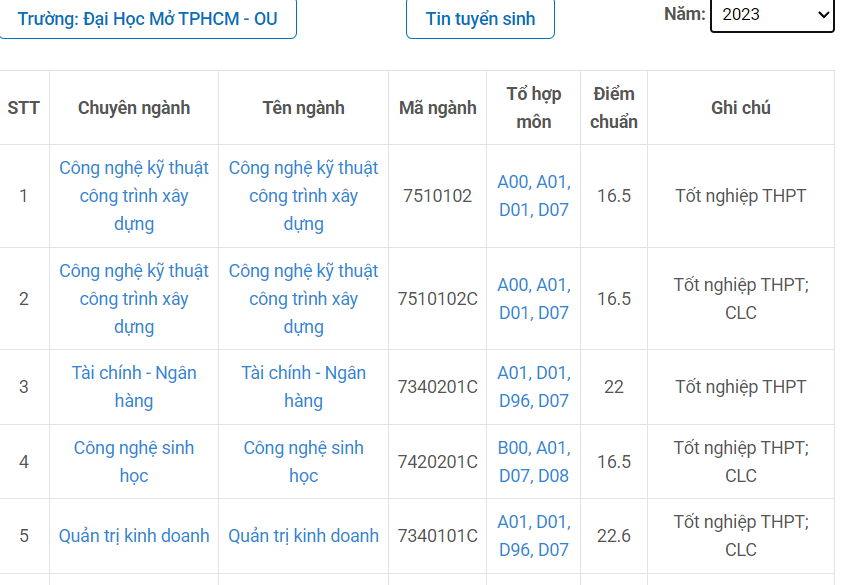

#### 2.3.2. Lấy dữ liệu của các trường qua từng năm

- B1: Hàm duyệt từng dòng dữ liệu từ df
- B2: Gửi requests từ link -> xử lý -> trả về soup
- B3: Từ soup -> trích xuất dữ liệu -> DataFrame
- B4: Gộp các df lại thành 1 df hoàn chỉnh theo 1 năm nhất định

In [14]:
def get_all_data(df: pd.DataFrame, year: str) -> pd.DataFrame:
    
    # chứa df của các trường đại học sau mỗi extract
    all_data = []
    # Đếm số lần requests
    countRequests = 0
    
    for uni_code, uni_url in zip(df['university_code'],df['university_url']):
        try:
            countRequests += 1
            print(f"Start {uni_code}")
            soup = get_html_after_popup_closed(uni_url,year)

            df = extract_data_from_html(soup,uni_code)

            all_data.append(df)

            print(f"Get data {uni_code} complete")
            print(f"End {uni_code}\n")
            # Nghi sau mỗi lần xử lý
            sleep_time = random.randint(12, 18)

            print(f"Sleep {sleep_time}s")
            time.sleep(sleep_time)
            
            # Khoảng K lần gửi requests thì ta cần  sleeep tiếp, tránh timeout. Craw mỗi năm cỡ 30p thôi.
            if countRequests in (8, 16, 32, 42, 50):
                print(f"Sleep 15s after {countRequests} requests")
                time.sleep(15)

        except Exception as e:
            print(f"ERROR: {uni_code}: {e}")

    final_data = pd.concat(all_data,ignore_index=True)
    return final_data

- Chạy thử

In [15]:
# Chạy thử khoảng 5 trường
univesity_df_test = university_df.iloc[18:23,:]

- Data test

In [16]:
univesity_df_test.head()

,university_code,university_name,university_url
18,TDTU,Đại Học Tôn Đức Thắng,https://huongnghiep.hocmai.vn/diem-truong/dai-...
19,VLU,Đại Học Dân Lập Văn Lang,https://huongnghiep.hocmai.vn/diem-truong/dai-...
20,IUH,Đại Học Công Nghiệp TPHCM,https://huongnghiep.hocmai.vn/diem-truong/dai-...
21,SIU,Đại Học Quốc Tế Sài Gòn,https://huongnghiep.hocmai.vn/diem-truong/dai-...
22,HVUH,Đại học Hùng Vương - TPHCM,https://huongnghiep.hocmai.vn/diem-truong/dai-...


In [17]:
# benchMark_scores = get_all_data(df=univesity_df_test,year = '2023')

- Kết quả

In [18]:
# benchMark_scores

- Lấy dữ liệu năm `2021`, `2022`, `2023`

In [19]:
# Năm 2021
# benchMark_scores_2021 = get_all_data(university_df,'2021')
# benchMark_scores_2021.to_csv("raw_benchmark_scores_hcm_2021.csv",index=False)
# time : 28p

In [20]:
# Năm 2022
# benchMark_scores_2022 = get_all_data(university_df,'2022') 
# benchMark_scores_2022.to_csv("raw_benchmark_scores_hcm_2022.csv",index=False)
# time : 30p24s

In [21]:
# Năm 2023
benchMark_scores_2023 = get_all_data(university_df,'2023')
benchMark_scores_2023.to_csv("raw_benchmark_scores_hcm_2023.csv",index=False)

Start HCMCONS
close popup
fillter 2023
Not found data for HCMCONS
Get data HCMCONS complete
End HCMCONS

Sleep 12s
Start HSU
close popup
fillter 2023
Not found data for HSU
Get data HSU complete
End HSU

Sleep 12s
Start SGU
close popup
fillter 2023
Get data SGU complete
End SGU

Sleep 15s
Start OU
close popup
fillter 2023
Get data OU complete
End OU

Sleep 12s
Start VHU
close popup
fillter 2023
Get data VHU complete
End VHU

Sleep 18s
Start GDU
close popup
fillter 2023
Get data GDU complete
End GDU

Sleep 18s
Start HCMUL
close popup
fillter 2023
Get data HCMUL complete
End HCMUL

Sleep 12s
Start HCA
close popup
fillter 2023
Not found data for HCA
Get data HCA complete
End HCA

Sleep 12s
Sleep 15s after 8 requests
Start UEH
close popup
fillter 2023
Not found data for UEH
Get data UEH complete
End UEH

Sleep 16s
Start HCMUC
close popup
fillter 2023
Not found data for HCMUC
Get data HCMUC complete
End HCMUC

Sleep 12s
Start UMP HCM
close popup
fillter 2023
Not found data for UMP HCM
Get d